# Attribute Relationships and Insights

In [49]:
### import libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns',None)
%matplotlib inline

## Is there a relationship between domain price and time-to-sale

   OrderDate   ShipDate  UnitPrice
0 2014-01-01 2014-01-08  1789.1350
1 2014-01-01 2014-01-08  1699.9950
2 2014-01-01 2014-01-08  1699.9950
3 2014-01-01 2014-01-08   349.5491
4 2014-01-01 2014-01-08  1699.9950


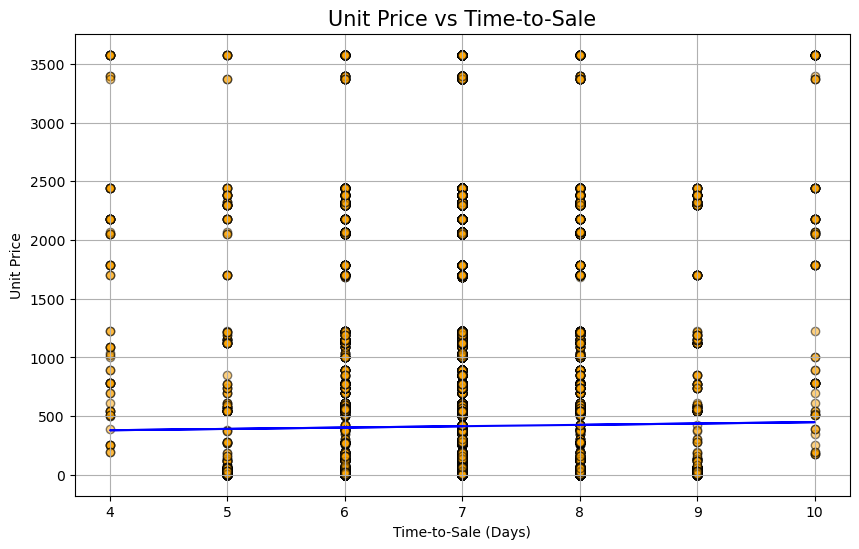

In [50]:
# Load Sales dataset
sales_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Sales.xlsx"
sales_df = pd.read_excel(sales_path)

# Check relevant columns
print(sales_df[['OrderDate', 'ShipDate', 'UnitPrice']].head())

# Convert OrderDate and ShipDate to datetime
sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'])
sales_df['ShipDate'] = pd.to_datetime(sales_df['ShipDate'])

# Calculate Time-to-Sale in days
sales_df['TimeToSale'] = (sales_df['ShipDate'] - sales_df['OrderDate']).dt.days

# Scatter plot of UnitPrice vs TimeToSale
plt.figure(figsize=(10, 6))
plt.scatter(sales_df['TimeToSale'], sales_df['UnitPrice'], alpha=0.5, color='orange', edgecolor='black')
plt.title('Unit Price vs Time-to-Sale', fontsize = 15)
plt.xlabel('Time-to-Sale (Days)')
plt.ylabel('Unit Price')
plt.grid(True)

## Add Trendline
from numpy.polynomial.polynomial import polyfit

x = sales_df['TimeToSale']
y = sales_df['UnitPrice']
b, m = polyfit(x, y, 1)  # Linear fit
plt.plot(x, m * x + b, color='blue')
plt.show()

In [51]:
sales_df = sales_df[sales_df['TimeToSale'] >= 0]

In [52]:
correlation = sales_df[['TimeToSale', 'UnitPrice']].corr()
print("Correlation between Time-to-Sale and Unit Price:")
correlation

Correlation between Time-to-Sale and Unit Price:


,TimeToSale,UnitPrice
TimeToSale,1.000000,0.007854
UnitPrice,0.007854,1.000000


## Does customer location influence domain purchase trends

Sales Columns: Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 18', 'StandardCost',
       'List Price', 'diif std cost', 'diff list price'],
      dtype='object')
Territory Columns: Index(['SalesTerritoryKey', 'Region', 'Country', 'Group', 'RegionImage'], dtype='object')

Sales by Location (Top Results):
          Country          Region   SalesAmount
0       Australia       Australia  9.051766e+06
9   United States       Southwest  5.708996e+06
7   United States       Northwest  3.639701e+06
4  United Kingdom  United Kingdom  3.387491e+06
3         Germany         Germany  2.890708e+06


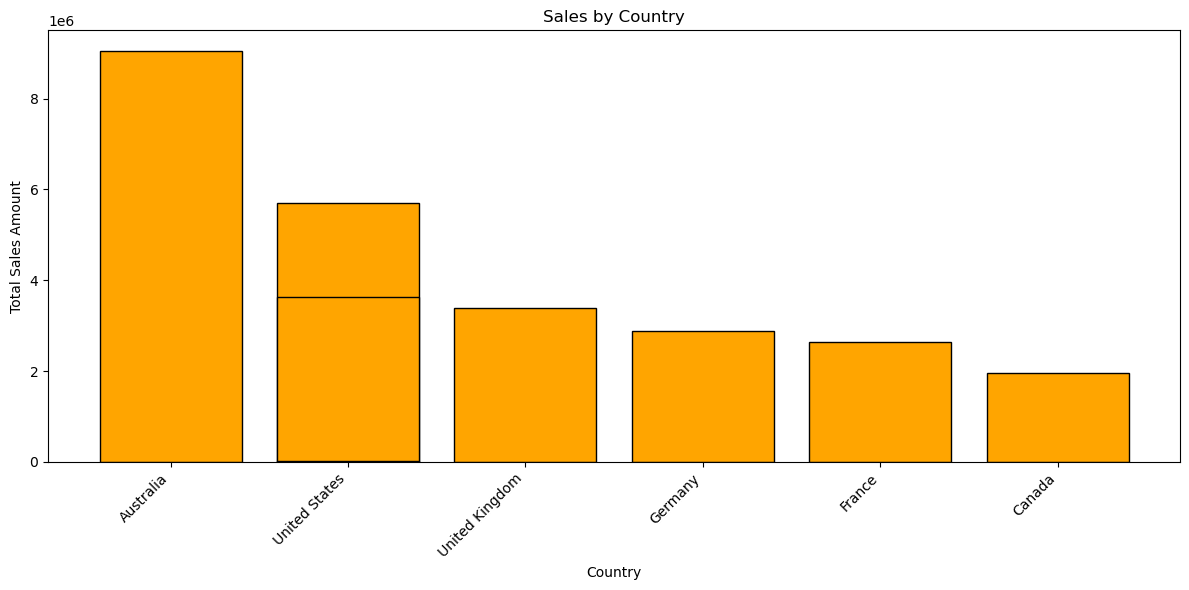

In [53]:
# Load datasets
sales_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Sales.xlsx"
territory_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Territory.xlsx"

sales_df = pd.read_excel(sales_path)
territory_df = pd.read_excel(territory_path)

# Check relevant columns
print("Sales Columns:", sales_df.columns)
print("Territory Columns:", territory_df.columns)

# Merge Sales and Territory on SalesTerritoryKey
merged_df = pd.merge(sales_df, territory_df, on='SalesTerritoryKey', how='inner')

# Group by Country or Region and sum SalesAmount
location_sales = merged_df.groupby(['Country', 'Region'])['SalesAmount'].sum().reset_index()

# Sort by SalesAmount (Descending)
location_sales = location_sales.sort_values(by='SalesAmount', ascending=False)

# Display top locations
print("\nSales by Location (Top Results):")
print(location_sales.head())

# Plot sales by location (Country)
plt.figure(figsize=(12, 6))
plt.bar(location_sales['Country'], location_sales['SalesAmount'], color='orange', edgecolor='black')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [54]:
#location_sales['SalesPerCapita'] = location_sales['SalesAmount'] / location_sales['Population']

In [55]:
location_sales.columns

Index(['Country', 'Region', 'SalesAmount'], dtype='object')

## Explore how location-related factors

Merged Data Columns: Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 18', 'StandardCost',
       'List Price', 'diif std cost', 'diff list price', 'Region', 'Country',
       'Group', 'RegionImage'],
      dtype='object')

Sales by Group:
           Group   SalesAmount
0         Europe  8.918724e+06
1  North America  1.133735e+07
2        Pacific  9.051766e+06


/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_22933/2405935174.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='SalesAmount', data=group_sales, palette='viridis')


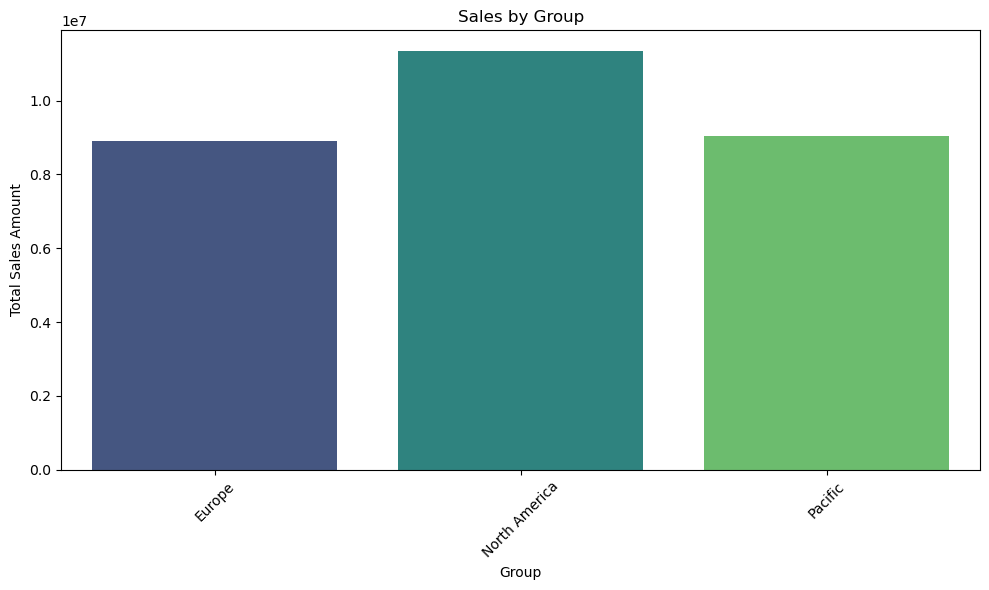

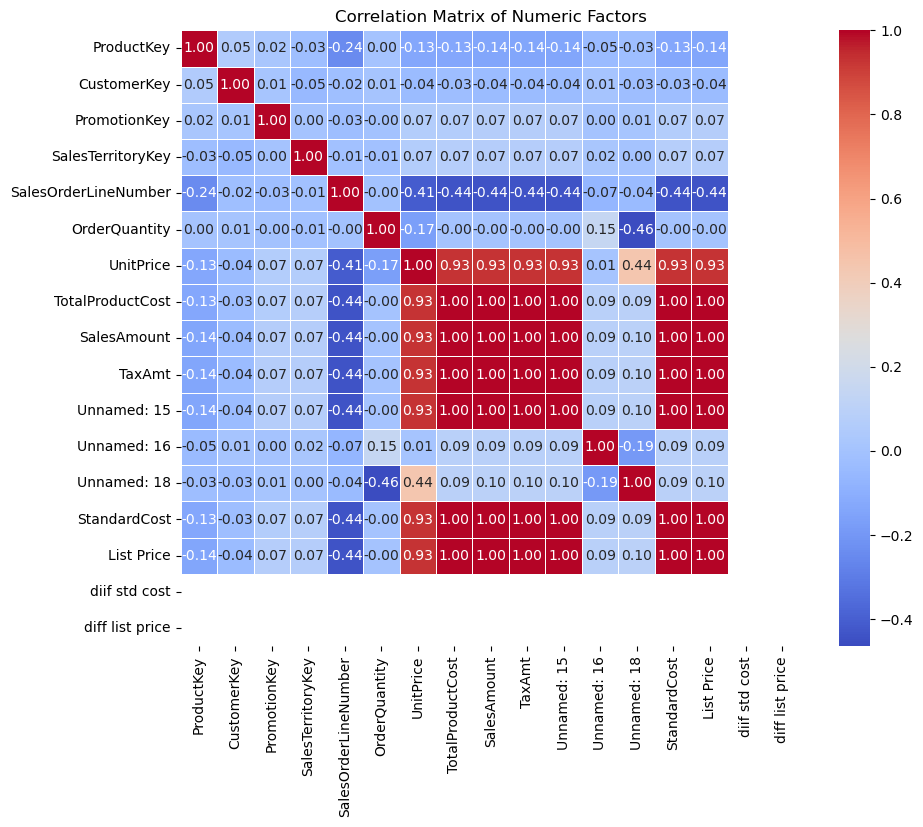

In [56]:
# Merge Sales and Territory datasets
merged_df = pd.merge(sales_df, territory_df, on='SalesTerritoryKey', how='inner')

# Check data structure
print("Merged Data Columns:", merged_df.columns)

# Group by Group and aggregate SalesAmount
group_sales = merged_df.groupby('Group')['SalesAmount'].sum().reset_index()

# Display results
print("\nSales by Group:")
print(group_sales)

# Plot sales by Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='SalesAmount', data=group_sales, palette='viridis')
plt.title('Sales by Group')
plt.xlabel('Group')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate correlation between numeric factors (if available)
numeric_data = merged_df.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Factors')
plt.show()

## Use statistical tests

In [57]:
from scipy.stats import f_oneway


# Merge Sales and Territory datasets
merged_df = pd.merge(sales_df, territory_df, on='SalesTerritoryKey', how='inner')

# Check data structure
print("Merged Data Columns:", merged_df.columns)

# Group data by Group and extract SalesAmount for each Group
groups = merged_df.groupby('Group')['SalesAmount'].apply(list)

# Perform ANOVA test
anova_result = f_oneway(*groups)

# Display ANOVA results
print("\nANOVA Test Results:")
print(f"F-Statistic: {anova_result.statistic:.4f}")
print(f"P-Value: {anova_result.pvalue:.4f}")

# Interpret the results
if anova_result.pvalue < 0.05:
    print("\nConclusion: There is a statistically significant difference in sales across groups.")
else:
    print("\nConclusion: There is no statistically significant difference in sales across groups.")

Merged Data Columns: Index(['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount',
       'TaxAmt', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 18', 'StandardCost',
       'List Price', 'diif std cost', 'diff list price', 'Region', 'Country',
       'Group', 'RegionImage'],
      dtype='object')

ANOVA Test Results:
F-Statistic: 419.4399
P-Value: 0.0000

Conclusion: There is a statistically significant difference in sales across groups.


## 	What factors influence higher sales

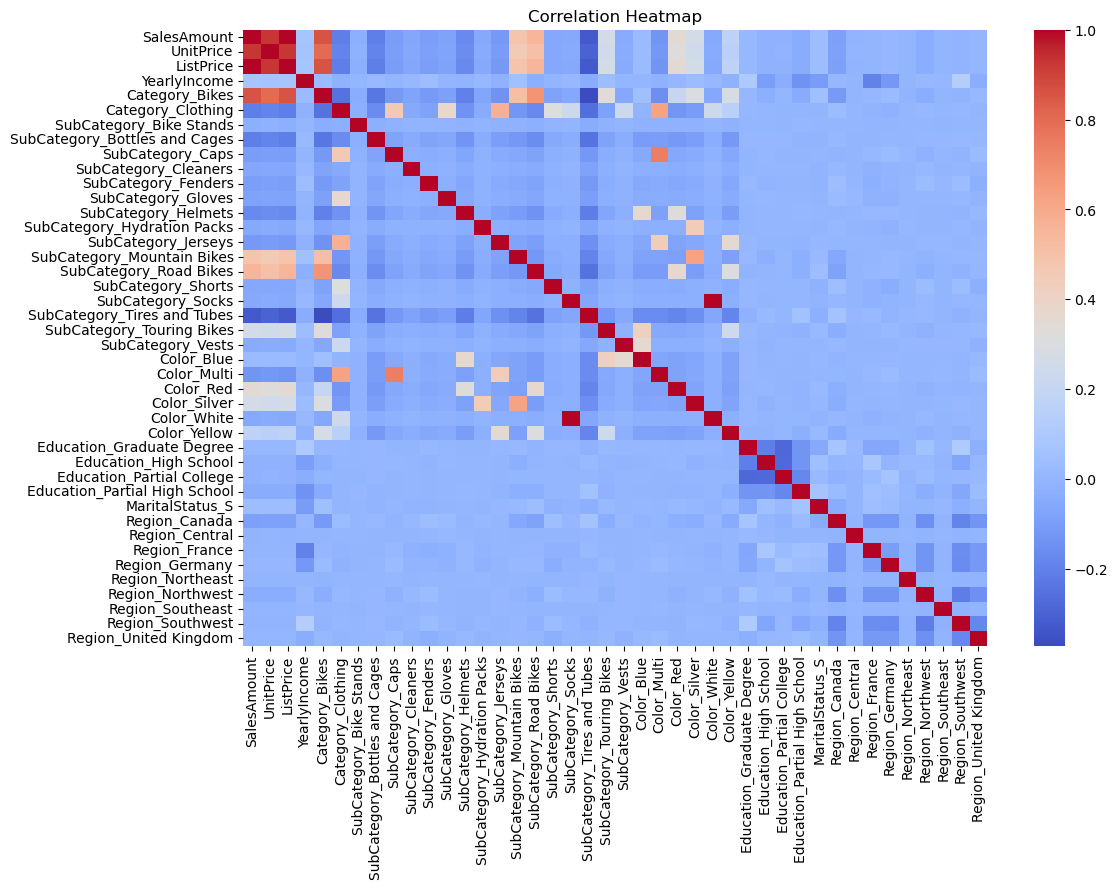

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Load datasets
sales_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Sales.xlsx"
product_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Product.xlsx"
customers_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Customers.xlsx"
territory_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Territory.xlsx"

sales_df = pd.read_excel(sales_path)
product_df = pd.read_excel(product_path)
customers_df = pd.read_excel(customers_path)
territory_df = pd.read_excel(territory_path)

# Merge datasets
sales_product = pd.merge(sales_df, product_df, on="ProductKey", how="inner")
sales_customer = pd.merge(sales_product, customers_df, on="CustomerKey", how="inner")
merged_df = pd.merge(sales_customer, territory_df, on="SalesTerritoryKey", how="inner")

# Select relevant columns
data = merged_df[[
    'SalesAmount', 'UnitPrice', 'ListPrice', 'YearlyIncome', 'Category',
    'SubCategory', 'Color', 'Education', 'MaritalStatus', 'Region'
]]

# Handle missing values
data = data.dropna()

# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Check correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [59]:
# Split data into features (X) and target (y)
X = data_encoded.drop('SalesAmount', axis=1)
y = data_encoded['SalesAmount']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")

# Display feature importance (coefficients)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:")
print(coefficients)

R^2 Score: 1.0000

Feature Importance:
                          Feature    Importance
1                       ListPrice  1.000000e+00
7                SubCategory_Caps  5.616904e-12
13            SubCategory_Jerseys  5.502532e-12
4               Category_Clothing  2.442116e-12
32                  Region_Canada  1.898838e-12
29      Education_Partial College  6.859675e-13
31                MaritalStatus_S  4.756607e-13
36               Region_Northeast  3.516051e-13
39               Region_Southwest  1.703880e-13
0                       UnitPrice  1.395028e-13
40          Region_United Kingdom  1.217858e-13
37               Region_Northwest  1.111302e-13
3                  Category_Bikes  9.885969e-14
11            SubCategory_Helmets  7.972670e-14
19      SubCategory_Touring Bikes  5.774131e-14
6   SubCategory_Bottles and Cages  5.543751e-14
5         SubCategory_Bike Stands  5.288370e-14
8            SubCategory_Cleaners  4.854735e-14
15         SubCategory_Road Bikes  3.781843e-14
3